# Project Template and Guidance

This Notebook is intended to provide some guidance for getting started with creating your first complete project workflow.

## Step 0 | Setup and Imports

Start by saving this Notebook to your Google Drive account. Then go to your Google Drive, click on the Colab Notebooks folder to find
You'll have to log into Google Drive this way if you want to load your dataset or save save your work as a new dataset.

In [37]:
# Mount your Google Drive. It will prompt you to log into your Google account.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [38]:
# Change the working directory to your project folder.
import os
drive_path = '/content/drive/MyDrive/Colab Notebooks/'
project_folder = 'Econ_0150_Project/'
os.chdir(drive_path + project_folder)

In [39]:
# Check which files are in your Project folder
os.listdir()

['example_data.gsheet', 'example_data.csv', 'Project_Template.ipynb']

In [40]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

In [41]:
# Once you've mounted Google Drive, you can open a dataset from your project folder
data = pd.read_csv('example_data.csv')
data.columns = data.columns.str.replace(' ', '_')
# And you can save your dataset after you've worked on it.
#data.to_csv('cleaned_data.csv')
data.head()

,Year,Postseason_Rank,Team,Total_Attendance,Avg._Attendance,Approx._Payroll,Payroll_%,W-L_Record,W_Record,L_Record,...,Batting_Average,On_Base_%,Slugging_%,Avg_Attendance_%_Capacity,Unnamed:_22,Unnamed:_23,Unnamed:_24,Unnamed:_25,Unnamed:_26,Unnamed:_27
0,2024,13,AZ Diamondbacks,"2,341,876.00","28,912.00","$161,660,152",3.17,0.54938,89,73,...,0.263,0.337,0.440,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024,10,ATL Braves,"3,011,755.00","37,182.00","$241,662,300",4.75,0.54938,89,73,...,0.243,0.309,0.415,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2024,11,BAL Orioles,"2,281,129.00","28,162.00","$117,347,715",2.30,0.56173,91,71,...,0.250,0.315,0.435,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2024,18,BOS Red Sox,"2,659,949.00","32,839.00","$160,834,775",3.16,0.50000,81,81,...,0.252,0.319,0.423,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2024,15,CHI Cubs,"2,909,794.00","35,923.00","$223,048,500",4.38,0.51235,83,79,...,0.242,0.317,0.393,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
data.rename(columns={'Avg._Attendance': 'Average_Attendance'}, inplace=True)
data.rename(columns={'Payroll_%': 'Payroll_Pct'}, inplace=True)

In [43]:
data['Average_Attendance'] = data['Average_Attendance'].str.replace(',', '').astype(float).astype(int)

In [44]:
data['Average_Attendance'] = data['Average_Attendance']/1000

In [45]:
#data_cleaned = data[data['Year'] != 2020]
data_cleaned = data[data['W_Record'] != 0]

## Step 1 (Part 1) | Univariate EDA

Summarize the main variables of interest.

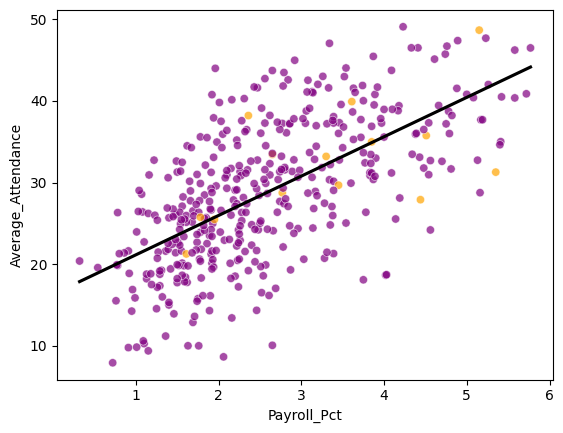

In [46]:
plot_2 = sns.scatterplot(data=data_cleaned, x='Payroll_Pct', y='Average_Attendance',
                hue=(data['Postseason_Rank'] == 1),
                palette={True: 'orange', False: 'purple'},
                legend=False, alpha = 0.7)

sns.regplot(
    data=data_cleaned,
    x='Payroll_Pct',
    y='Average_Attendance',
    scatter=False,
    color='black',
    ci=None,
    ax=plot_2
)

plt.show()


In [47]:
model_1 = smf.ols(formula = 'Payroll_Pct ~ Postseason_Rank', data = data_cleaned).fit()
print(model_1.summary().tables[1])

                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           3.3421      0.106     31.415      0.000       3.133       3.551
Postseason_Rank    -0.0478      0.006     -7.967      0.000      -0.060      -0.036


In [48]:
model_2 = smf.ols(formula = 'Payroll_Pct ~ Average_Attendance', data = data_cleaned).fit()
print(model_2.summary().tables[1])

                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.1866      0.151      1.239      0.216      -0.109       0.483
Average_Attendance     0.0837      0.005     16.748      0.000       0.074       0.094


In [49]:
model_both = smf.ols('W_Record ~ Payroll_Pct + Average_Attendance', data=data_cleaned).fit(cov_type='HC3')
print(model_both.summary().tables[1])

                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             62.9053      2.161     29.110      0.000      58.670      67.141
Payroll_Pct            2.0586      0.573      3.591      0.000       0.935       3.182
Average_Attendance     0.4397      0.089      4.946      0.000       0.265       0.614


 Winsi​=β0​+β1​(Payroll_Pcti​)+β2​(Average_Attendancei​)+ϵ

In [55]:
bins = [0, 10, 20, 30, 40, 50]
labels = ['< 10', '10-20', '20-30', '30-40', '40-50']

data_cleaned['Attendance_Group'] = pd.cut(
    data_cleaned['Average_Attendance'],
    bins=bins,
    labels=labels,
    right=True,
    include_lowest=True
)

/tmp/ipython-input-3087825784.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['Attendance_Group'] = pd.cut(


Text(0, 0.5, 'Win %')

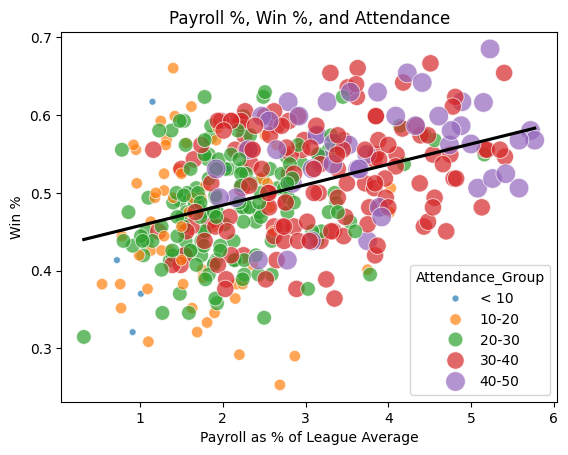

In [56]:
all_teams = sns.scatterplot(
    data=data_cleaned,
    x='Payroll_Pct',
    y='W-L_Record',
    hue='Attendance_Group',
    size='Attendance_Group',
    sizes=(200, 25),
    alpha=0.7
)

sns.regplot(
    data=data_cleaned,
    x='Payroll_Pct',
    y='W-L_Record',
    scatter=False,
    color='black',
    ci = None,
)

plt.title('Payroll %, Win %, and Attendance')
plt.xlabel('Payroll as % of League Average')
plt.ylabel('Win %')



In [57]:
groups_to_keep = ['10-20', '40-50']
data_filtered = data_cleaned[data_cleaned['Attendance_Group'].isin(groups_to_keep)].copy()

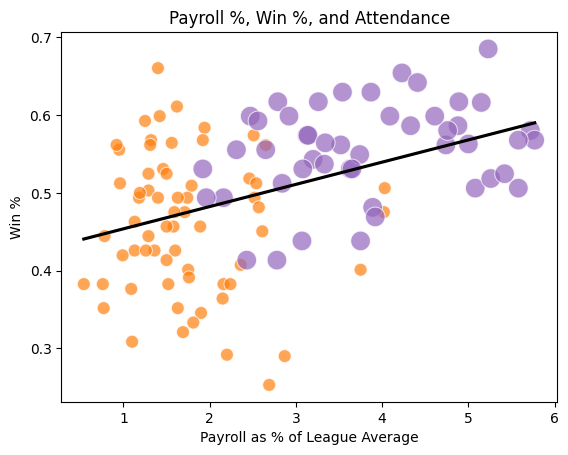

In [58]:
some_teams = sns.scatterplot(
    data=data_filtered, # <-- Use the filtered data
    x='Payroll_Pct',
    y='W-L_Record',
    hue='Attendance_Group',
    size='Attendance_Group',
    sizes=(200, 50),
    alpha=0.7,
    legend = False
)

sns.regplot(
    data=data_filtered,
    x='Payroll_Pct',
    y='W-L_Record',
    scatter=False,
    color='black',
    ci = None,
)



plt.title('Payroll %, Win %, and Attendance')
plt.xlabel('Payroll as % of League Average')
plt.ylabel('Win %')
plt.show()

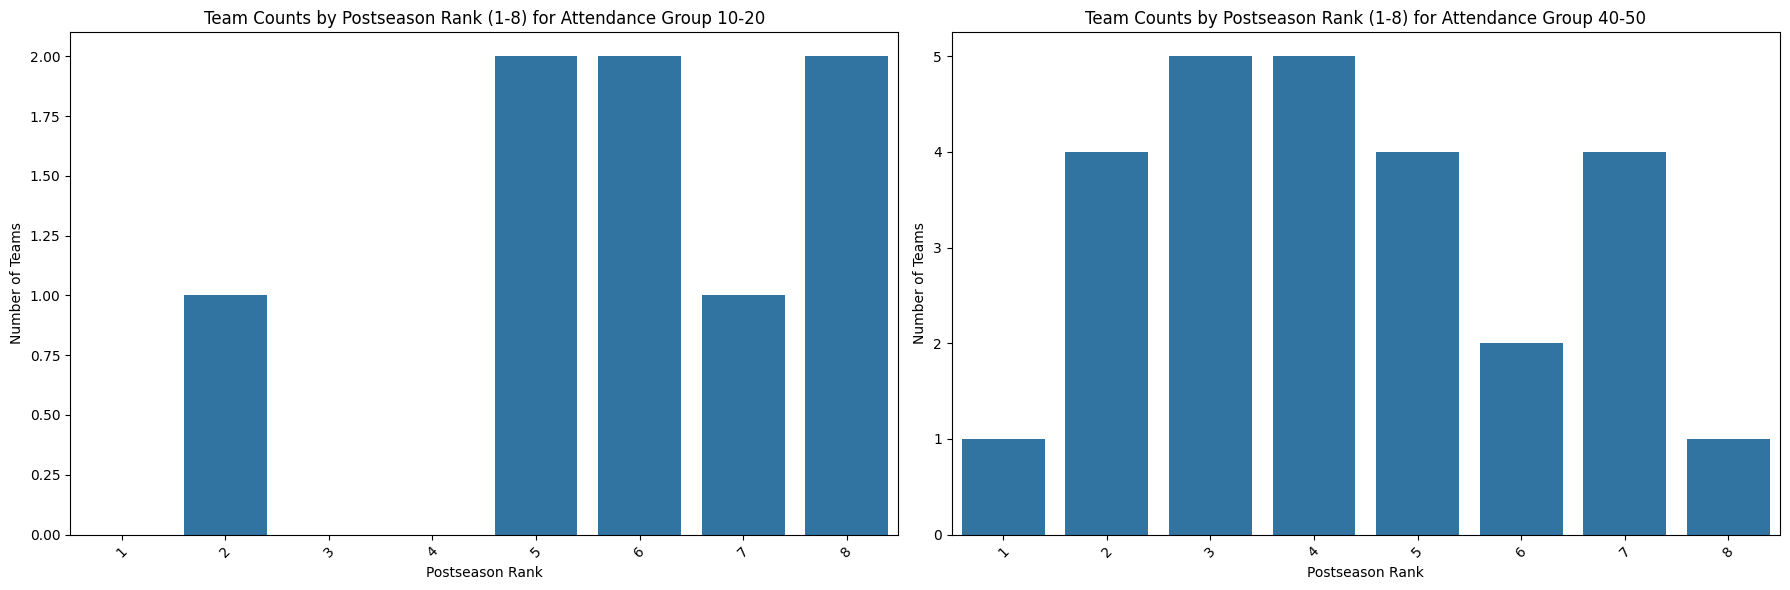

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Define the full range of Postseason Ranks to display
full_postseason_ranks = pd.CategoricalDtype(categories=range(1, 9), ordered=True)

# Filter for Attendance_Group '10-20' and Postseason_Rank 1-8
data_10_20 = data_filtered[
    (data_filtered['Attendance_Group'] == '10-20') &
    (data_filtered['Postseason_Rank'] >= 1) &
    (data_filtered['Postseason_Rank'] <= 8)
].copy()
# Convert 'Postseason_Rank' to a Categorical type with the full range of ranks
data_10_20['Postseason_Rank'] = data_10_20['Postseason_Rank'].astype(full_postseason_ranks)

# Filter for Attendance_Group '40-50' and Postseason_Rank 1-8
data_40_50 = data_filtered[
    (data_filtered['Attendance_Group'] == '40-50') &
    (data_filtered['Postseason_Rank'] >= 1) &
    (data_filtered['Postseason_Rank'] <= 8)
].copy()
# Convert 'Postseason_Rank' to a Categorical type with the full range of ranks
data_40_50['Postseason_Rank'] = data_40_50['Postseason_Rank'].astype(full_postseason_ranks)

# Create a figure with two subplots side-by-side
fig, axes = plt.subplots(1, 2, figsize=(18, 6)) # 1 row, 2 columns

# Plot for '10-20' Attendance_Group on the first subplot
sns.countplot(data=data_10_20, x='Postseason_Rank', ax=axes[0])
axes[0].set_title('Team Counts by Postseason Rank (1-8) for Attendance Group 10-20')
axes[0].set_xlabel('Postseason Rank')
axes[0].set_ylabel('Number of Teams')
axes[0].tick_params(axis='x', rotation=45)

# Plot for '40-50' Attendance_Group on the second subplot
sns.countplot(data=data_40_50, x='Postseason_Rank', ax=axes[1])
axes[1].set_title('Team Counts by Postseason Rank (1-8) for Attendance Group 40-50')
axes[1].set_xlabel('Postseason Rank')
axes[1].set_ylabel('Number of Teams')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout() # Adjust layout to prevent overlapping titles/labels
plt.show()


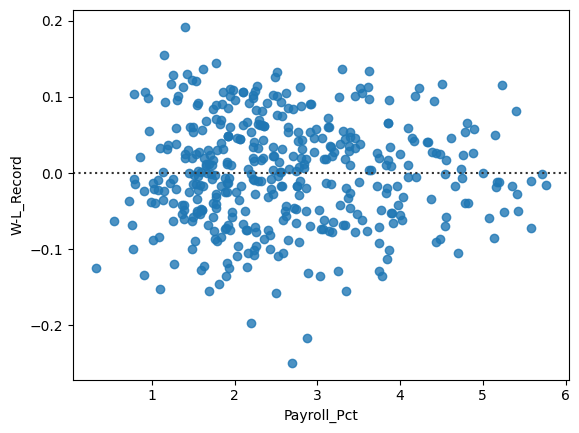

In [62]:
resid_1 = sns.residplot(
    data=data_cleaned,
    x='Payroll_Pct',
    y='W-L_Record')

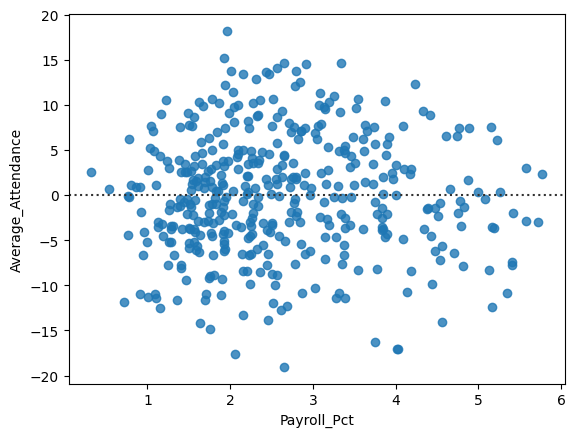

In [65]:
resid_2 = sns.residplot(
    data=data_cleaned,
    x='Payroll_Pct',
    y='Average_Attendance')